In [1]:
import random as ran
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math

In [2]:
h=1
tmax=100
tpoints=np.arange(0,tmax+1,h)

sample=10000
s_points=np.arange(0,sample+1,h)

In [3]:
first=1
p_same=2/3
p_change=1/3

In [4]:
ele=first
pos=first
position=[]

In [5]:
up=2
down=-2
right=1
left=-1

In [6]:
# loop for capture possibility
for i in s_points:
    position.append(pos)
    ele = 1
    # 2nd move        
    if ran.random() > p_change:
        ele += right
        test = right
    else:
        if ran.random() > 1/2:
            ele += 0*up
            test = up
        else:
            ele += 0*down
            test = down
    # 3rd move  
    if test == right:
        if ran.random() > p_change:
            ele += right
            test = right
        else:
            if ran.random() > 1/2:
                ele += 0*up
                test = up
            else:
                ele += 0*down
                test = down
    else:
        if test == up:
            if ran.random() > p_change:
                ele += 0*up
                test = up
            else:
                if ran.random() > 1/2:
                    ele += left
                    test = left
                else:
                    ele += right
                    test = right
        else:
            if test == down:
                if ran.random() > p_change:
                    ele += 0*down
                    test = down
                else:
                    if ran.random() > 1/2:
                        ele += left
                        test = left
                    else:
                        ele += right
                        test = right
        # 4th and later move
        for t in range(3,tmax+1):
            if test == right:
                if ran.random() > p_change:
                    ele += right
                    test = right
                else:
                    if ran.random() > 1/2:
                        ele += 0*up
                        test = up
                    else:
                        ele += 0*down
                        test = down
            else:
                if test == up:
                    if ran.random() > p_change:
                        ele += 0*up
                        test = up
                    else:
                        if ran.random() > 1/2:
                            ele += left
                            test = left
                        else:
                            ele += right
                            test = right
                else:
                    if test == down:
                        if ran.random() > p_change:
                            ele += 0*down
                            test = down
                        else:
                            if ran.random() > 1/2:
                                ele += left
                                test = left
                            else:
                                ele += right
                                test = right
                    else:
                        if test == left:
                            if ran.random() > p_change:
                                ele += left
                                test = left
                            else:
                                if ran.random() > 1/2:
                                    ele += 0*up
                                    test = up
                                else:
                                    ele += 0*down
                                    test = down
    pos = ele


In [7]:
print(position)

[1, 25, 3, 3, 3, 2, 3, -6, -9, -6, 7, 3, 16, -6, 2, 4, 2, 3, -4, 14, 3, 3, -22, 3, 8, 2, 2, -16, 3, 3, -4, 2, 3, 6, 2, 3, 44, 2, 3, 3, 3, -6, -24, -1, 3, 3, 3, 3, 2, 8, 3, 3, 3, -12, 3, 12, -3, 3, 3, 3, -12, 3, -11, -3, 3, 3, 2, -16, 2, -26, 2, -9, 3, 2, -6, 2, 2, 5, 2, 37, 1, 3, 3, 3, -9, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, -9, -5, 2, 2, 2, 2, 2, 3, -10, 3, 3, 35, 3, 3, 3, 3, 3, 3, -3, 2, -1, 3, 3, 2, 3, 3, 3, 5, -20, 3, -31, 2, 3, -24, 3, 3, 3, -6, 2, 8, 7, -18, 2, -1, 3, 14, 16, 3, -7, 15, 3, 3, 3, 16, 3, -4, 3, 10, 2, 3, 3, 2, 29, 3, 3, 2, 3, 3, -12, 3, 2, 3, 2, 2, -6, 3, -27, 3, 2, 30, 3, 3, -3, 9, 3, 2, 2, 3, 3, 13, 8, -6, -34, 3, 3, 2, 22, 2, 8, 3, -12, 3, -32, 3, 2, 13, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, -40, 2, 3, 3, 3, -18, 3, 2, 3, 2, 3, 3, 2, -13, 3, -17, 2, 2, 11, 6, 2, 3, 2, 2, 2, 3, 3, 21, 3, 3, 3, 3, 3, 3, -13, 3, 2, -23, 3, 3, -14, 3, 15, -10, 3, 3, 3, 3, 2, 3, 17, 3, 3, 2, 2, -1, 3, 3, 2, 0, 2, 3, 3, 2, 2, 2, 2, 2, 3, -20, 2, -6, -3, 2, 3, 3, 3, -20, 3, 3, 2

In [8]:
position=position[1:sample+1]
print(len(position))

10000


In [9]:
reactor=[]
capture=[]
through=[]

num_r=0
num_c=0
num_t=0

size=np.arange(0,tmax+1,h)
print(len(size))

101


In [10]:
for j in range(tmax+1):
    reactor.append(num_r)
    capture.append(num_c)
    through.append(num_t)
    x = size[j]
    nt=0
    nc=0
    nr=0
    for i in range(sample):
        if position[i] > x:
            nt += 1
        elif position[i] > 0:
            nc += 1
        else:
            nr += 1
    if nr == 0:
        num_r = 0.001
    else:
        num_r = nr
    if nc == 0:
        num_c = 0.001
    else:
        num_c = nc
    if nt == 0:
        num_t = 0.001
    else:
        num_t = nt

In [11]:
reactor_n=reactor[1:tmax+1]
capture_n=capture[1:tmax+1]
through_n=through[1:tmax+1]

In [12]:
print(reactor_n)
print(len(reactor_n))

[1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716, 1716]
100


In [13]:
print(capture_n)
print(len(capture_n))

[0.001, 81, 2325, 6831, 6912, 6987, 7083, 7159, 7239, 7323, 7393, 7442, 7520, 7584, 7639, 7699, 7754, 7803, 7844, 7884, 7922, 7961, 7995, 8029, 8054, 8078, 8103, 8126, 8151, 8169, 8180, 8198, 8209, 8221, 8233, 8235, 8241, 8251, 8261, 8266, 8268, 8271, 8272, 8273, 8277, 8278, 8278, 8278, 8278, 8279, 8280, 8280, 8280, 8281, 8282, 8282, 8282, 8283, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284, 8284]
100


In [14]:
print(through_n)
print(len(through_n))

[8284, 8203, 5959, 1453, 1372, 1297, 1201, 1125, 1045, 961, 891, 842, 764, 700, 645, 585, 530, 481, 440, 400, 362, 323, 289, 255, 230, 206, 181, 158, 133, 115, 104, 86, 75, 63, 51, 49, 43, 33, 23, 18, 16, 13, 12, 11, 7, 6, 6, 6, 6, 5, 4, 4, 4, 3, 2, 2, 2, 1, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
100


In [15]:
size=size[1:tmax+1]
print(size)
print(len(size))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100


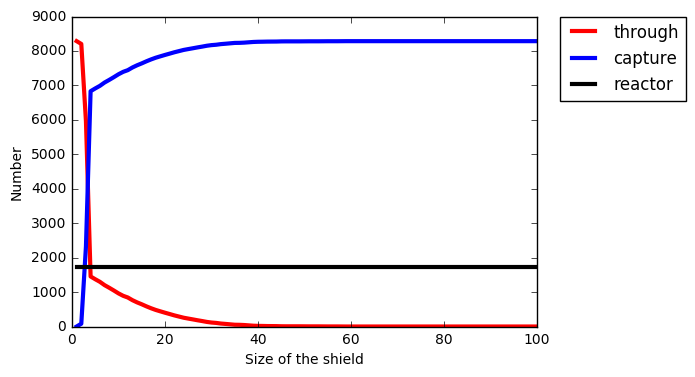

In [16]:
size_array=np.array(size)
through_array=np.array(through_n)
capture_array=np.array(capture_n)
reactor_array=np.array(reactor_n)
plt.plot(size_array,through_array,'-',label='through',color='red',linewidth=3.0)
plt.plot(size_array,capture_array,'-',label='capture',color='blue',linewidth=3.0)
plt.plot(size_array,reactor_array,'-',label='reactor',color='black',linewidth=3.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Size of the shield')
plt.ylabel('Number')
plt.show()





In [17]:
P_through=through_array/sample
P_capture=capture_array/sample
P_reactor=reactor_array/sample

In [18]:
m_through,b_through=np.polyfit(size,np.log(P_through),1)
print(m_through,b_through)


fit_t=m_through*size+b_through
uncertainty_t=(1/tmax)*np.sum((fit_t-np.log(P_through))**2)#Standard Deviation
print(math.sqrt(uncertainty_t))

-0.19392138561 0.290508245055
1.8908576843436515


In [19]:
m_capture,b_capture=np.polyfit(size,np.log(P_capture),1)
print(m_capture,b_capture)


fit_c=m_capture*size+b_capture
uncertainty_c=(1/tmax)*np.sum((fit_t-np.log(P_capture))**2)#Standard Deviation
print(math.sqrt(uncertainty_c))

0.0139008860346 -1.13104138693
10.993977440560805


In [20]:
m_reactor,b_reactor=np.polyfit(size,np.log(P_reactor),1)
print(m_reactor,b_reactor)


fit_t=m_reactor*size+b_reactor
uncertainty_r=(1/tmax)*np.sum((fit_t-np.log(P_reactor))**2)#Standard Deviation
print(math.sqrt(uncertainty_r))

6.10769185202e-18 -1.76258909193
2.152802317486082e-16
